In [43]:
from sympy import simplify, lambdify, latex
from sympy.abc import p, N
import matplotlib.pyplot as plt
import numpy as np
#from sympy.plotting import plot

In [44]:

f1 = p*(1-p)**(N) * (((1-p)**(-1)-(1+N)*((1-p)**(-N-1)))/(1-(1-p)**(-1)) + ((1-p)**(-2))*(1-(1-p)**(-N))/((1-(1-p)**(-1))**2))

f1

p*(1 - p)**N*((-(1 - p)**(-N - 1)*(N + 1) + 1/(1 - p))/(1 - 1/(1 - p)) + (1 - 1/(1 - p)**N)/((1 - p)**2*(1 - 1/(1 - p))**2))

In [45]:
f2 = simplify(f1)

f2

(p*(N - (1 - p)**N + 1) + (1 - p)**N - 1)/p

In [46]:
latex(f2)

'\\frac{p \\left(N - \\left(1 - p\\right)^{N} + 1\\right) + \\left(1 - p\\right)^{N} - 1}{p}'

In [47]:
f3 = N + ((1-p)**(N+1)-(1-p))/p

In [48]:
fun1 = lambdify((p, N), f1)
fun2 = lambdify((p, N), f2)
fun3 = lambdify((p, N), f3)

fun1v = np.vectorize(fun1, excluded=['N'])
fun2v = np.vectorize(fun2, excluded=['N'])
fun3v = np.vectorize(fun3, excluded=['N'])

In [49]:
p_=0.7
N_=100
print(fun1(p_, N_))
print(fun2(p_, N_))
print(fun3(p_, N_))

99.57142857142858
99.57142857142856
99.57142857142857


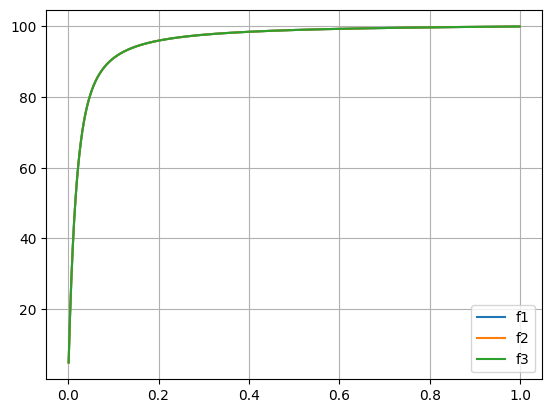

In [50]:
#plot(f2.subs(N, 100), (p, 0.1, 0.9)) #, ylim=(0, 100))

ps = np.linspace(0.001,0.999,1000)
fig, ax = plt.subplots()
ax.plot(ps, fun1v(ps, N_), label='f1')
ax.plot(ps, fun2v(ps, N_), label='f2')
ax.plot(ps, fun3v(ps, N_), label='f3')
ax.legend()
ax.grid()